# COGS 108 - Final Project

## Introduction

### Research Question


Is it the qualities of a wine that make it good, or is the rating system of wines more subjective? In essence, is there any correlation between the subjective ratings and objective qualities of a wine?

### Hypothesis


Our main hypothesis would be that rating wines is subjective, so predicting a wines quality is based more on sentiment than the specific qualities of the wine itself, like alcohol percentage, acidity, etc.

### Datasets

We are using the following datasets:

- Wine Quality Datasets 
    - Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
    Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
    - Dataset Name: winequality_red.csv
    - Link to the dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality
    - Number of observations: 1599
    - This data set outlines the qualities and qualitative assessment of red wines based on 11 physicochemical characteristics.
    - Dataset Name: winequality_white.csv
    - Link to the dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality
    - Number of observations: 4898
    - This data set outlines the qualities and qualitative assessment of white wines based on 11 physicochemical characteristics.


- Wine Review Datasets
    - Dataset Name: winemag-data_first150k.csv
    - Link to the dataset: https://www.kaggle.com/zynicide/wine-reviews
    - Number of observations: 150000
    - This dataset contains numerous reviews of various wine brands and types from the website WineEnthusiast

We plan to merge these numerical data sets together by including red or white as a characteristic when training our program to predict wine quality based on these characteristics. For the review dataset, we shall use a TFIDF training model on the written review data.

### Background 

 Data analysis is useful for finding the quantitative elements which contribute to the quality of wine taste. Though it is hard to detect the tiny difference of taste by human tongue, the data analysis makes it possible to quantify and visualize these characteristics so that it helps us select a better wine without need for a need for a professional such as a sommelier. 
	Distinguishing wine quality is not a easy job. As mentioned in  “Wine tasting terms” (cawineclub.com), it demands and understanding of many technical terms and professionalism, which makes difficult for beginners to distinguish the quality of
    wine during tasting. For example, a few of the most important elements to judge the taste are acidity, alcohol, and chlorides. However, most people would find it difficult to distinguish these qualities at an accurate level.
	There are several prior studies which approach the quantification of taste by machine learning. For example, the research of Zachary Bushman in “Using machine learning to detect the flaw of beer” proved the possibility of sensory quality control by machine learning. Our research is to apply this similar method to detecting the quality of different wines instead.


References (include links): 

-https://www.cawineclub.com/wine-tasting-terms 

-https://www.gastrograph.com/blogs/gastronexus/flaw-detection-in-beer.html


### Proposed Methods


For our data, the files are relatively clean already; very little in the way of aggregating would be required to make this set trainable, although we plan to remove certain outliers to help form our regression. However, we plan to model the quality aspect using binary models, so since most of the wines are scored from 4-8, we plan on scaling the score quality to be 0 or 1 so the data is easier to fit. For the second dataset, we plan to use a TF-IDF sentiment analysis model to train off the data set, so we likely will remove any columns besides the ones we train the decision tree classifier off of.


For data analysis, we plan to create regression models to predict the quality value of the wine based on specific characteristics for the numerical quality dataset, and use TFIDF analysis for the review dataset.


We plan to juxtapose the relative accuracies of both models to predict the "goodness" of a wine. Based on whichever is more accurate, we shall pick and explain the results accordingly.

Packages we plan to use:
- matplotlib
- pandas
- scikit-learn
- numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import patsy
import seaborn as sns
import statsmodels.api as sm
import scipy
import scipy.io as sio
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

C:\Users\sylry\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Cleaning / Pre-processing

In [3]:
#read in our wine quality datasets using pandas, clean by separating column vals based on ";" delimiter
dfred = pd.read_csv("winequality-red.csv",sep=";")
dfwhite = pd.read_csv("winequality-white.csv",sep=";")

#used concat to merge white and red wine datasets regardless of wine color
dfquals = pd.concat([dfred,dfwhite])
dfquals.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
#use method to make quality a binary model
def binary(label):
    if label >=6 :
        return 1
    elif label < 6:
        return 0
    else:
        return label
    
#applies method so every quality 6 and above is good (1) while below is bad (0)
dfquals["val"] = dfquals.quality.apply(binary)
#arbitrary choosing of "good" or "bad" cutoff might affect model outcome

dfquals.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,val
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [5]:
#read in the wine review dataset, clean by droppin extra columns and mergign
MR_df2_sub = pd.read_csv("winemag-data-130k-v2.csv")
MR_df1_sub = pd.read_csv('winemag-data_first150k.csv',dtype=str)

#cleaned the review dataset by dropping all non-needed rows like reviewer name and location
MR_df = pd.concat([MR_df1_sub,MR_df2_sub])
MR_df = MR_df[["description","points"]]
MR_df["points"] = pd.to_numeric(MR_df.points)


#method for quantifying review scores for review dataset
def binary2(label):
    if label > 88 :
        return 1
    elif label <= 88:
        return 0
    else:
        return label
    
#apply method to make data quantification binary for training model
MR_df["val"] = MR_df.points.apply(binary2)
#arbitrary choosing of "good" or "bad" cutoff might affect model outcome

MR_df.head(10)

,description,points,val
0,This tremendous 100% varietal wine hails from ...,96,1
1,"Ripe aromas of fig, blackberry and cassis are ...",96,1
2,Mac Watson honors the memory of a wine once ma...,96,1
3,"This spent 20 months in 30% new French oak, an...",96,1
4,"This is the top wine from La Bégude, named aft...",95,1
5,"Deep, dense and pure from the opening bell, th...",95,1
6,Slightly gritty black-fruit aromas include a s...,95,1
7,Lush cedary black-fruit aromas are luxe and of...,95,1
8,This re-named vineyard was formerly bottled as...,95,1
9,The producer sources from two blocks of the vi...,95,1


## Data Visualization

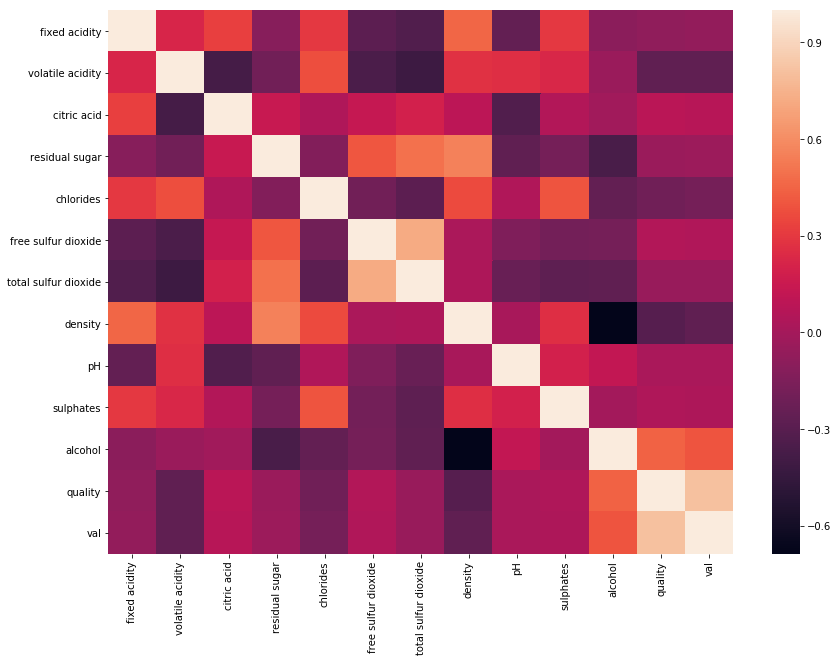

In [6]:
#heat map to show correlation between different values in wine quality dataset
f, ax = plt.subplots(figsize=(14, 10))
qualcorr = dfquals.corr()
sns.heatmap(qualcorr)
plt.show()

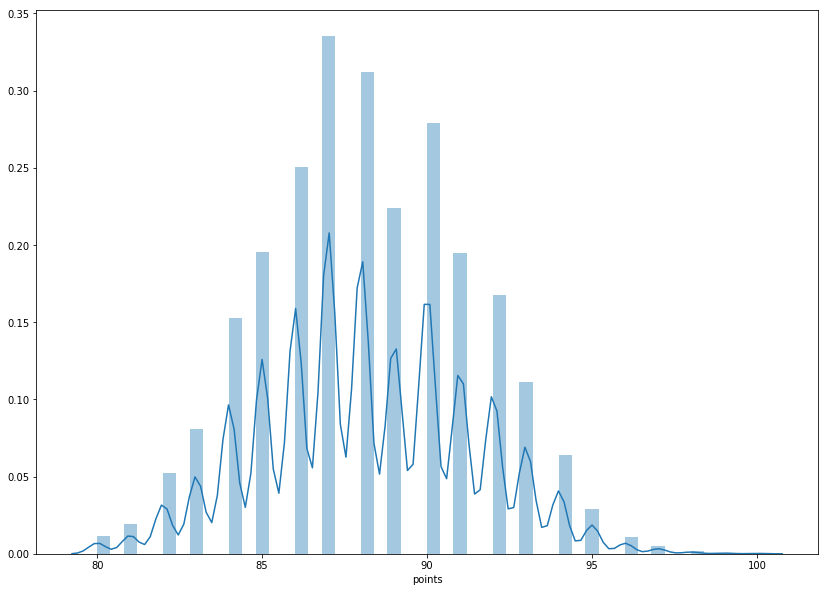

(1782.757192123287, 0.0)

In [7]:
#distribution for review point values
f, ax = plt.subplots(figsize=(14, 10))
sns.distplot(MR_df.points)
plt.show()
stat, pval = scipy.stats.normaltest(MR_df.points)
stat, pval

The p-value from the normal test is 0 so we can conclude the wine review points data is not normally distributed.

## Data Analysis

In [8]:
#set up variables for analysis of 12 qualities data set in next cell
num = (int)(len(dfquals)*0.8)
dfquals = dfquals.drop(["quality"],axis=1)
X_train = dfquals.as_matrix()[:num,:-1]
Y_train = dfquals.as_matrix()[:num,-1]
X_test = dfquals.as_matrix()[num:,:-1]
Y_test = dfquals.as_matrix()[num:,-1]


In [9]:
#Training result and testing result of numerical dataset using decision tree classifier 
clf_tree = DecisionTreeClassifier(criterion='entropy')
clf_tree.fit(X_train,Y_train)
print(classification_report(Y_train, clf_tree.predict(X_train)))
print(classification_report(Y_test, clf_tree.predict(X_test)))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1985
        1.0       1.00      1.00      1.00      3212

avg / total       1.00      1.00      1.00      5197

             precision    recall  f1-score   support

        0.0       0.59      0.46      0.52       399
        1.0       0.78      0.85      0.82       901

avg / total       0.72      0.73      0.73      1300



In [10]:
#set up the training and testing data for the model
MR_y = MR_df['val']
num_training = int(len(MR_df)*0.8)
num_testing = int(len(MR_df)*0.2)
MR_train_y = MR_y[:num_training]
MR_test_y = MR_y[num_training:]

# create a TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,analyzer='word',max_features=2000,tokenizer=word_tokenize)
# transform the description of MR_df into vectors
#MR_X = vectorizer.fit_transform
MR_tfidf_X = tfidf.fit_transform(MR_df["description"]).toarray()

In [11]:
# split the MR_tfidf_X and MR_y into training set and test set.
MR_train_tfidf_X = MR_tfidf_X[:num_training]
MR_train_tfidf_y = MR_y[:num_training]
MR_test_tfidf_X = MR_tfidf_X[num_training:]
MR_test_tfidf_y = MR_y[num_training:]

# define train_SVM function which initializes SVM classifier and trains it
def train_SVM(X, y):
    # YOUR CODE HERE
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X,y)
    return clf

In [12]:
# train an SVM classifier
MR_tfidf_clf = train_SVM(MR_train_tfidf_X,MR_train_tfidf_y)
# predict
MR_pred_train_tfidf_y = MR_tfidf_clf.predict(MR_train_tfidf_X)
MR_pred_test_tfidf_y = MR_tfidf_clf.predict(MR_test_tfidf_X)

In [13]:
#Training result and testing result of wine review dataset using decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(MR_train_tfidf_X,MR_train_tfidf_y)
print(classification_report(MR_train_tfidf_y, MR_tfidf_clf.predict(MR_train_tfidf_X)))
print(classification_report(MR_test_tfidf_y, MR_tfidf_clf.predict(MR_test_tfidf_X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    129010
          1       1.00      1.00      1.00     95710

avg / total       1.00      1.00      1.00    224720

             precision    recall  f1-score   support

          0       0.82      0.85      0.83     29489
          1       0.83      0.80      0.81     26692

avg / total       0.82      0.82      0.82     56181



## Results

After cleaning our two separate datasets, the numerical wine quality dataset and the sentiment based review dataset, we could quickly visualize the data to help us better understand the relative relationships within it. For the numerical dataset, we mapped the correlation values of all the numerical qualities and used a heatmap to visualize how highly or lowly correlated certain values were to one another. This visualization helped us understand that all the individual qualities didn’t necessarily highly correlate with the quality rating, but combined values may have. The heatmap seemed to suggest that alcohol content had the highest correlation value versus quality, but it seemed more likely that that was only one aspect of the linear model. As for the review dataset, it was difficult to really visualize the data, so we plotted a histogram of the review score distribution to help us understand the relative distribution of the wine scores, which helped us in setting our cutoff point for our models’ binary output of 0 being a “bad” wine and 1 being a “good” wine. However, this arbitrary choice of good and bad wine cutoffs likely could have affected the outcome of our data.


As for the ethics of our datasets and our predictive models, there were no real ethical issues that arose from using our numerical dataset, as it only provided wines and their qualities, so no real issues with privacy or ethicality arose from that data or its linear model. For our review dataset, it was mostly the same case, however the data did contain info on the reviewers, such as their twitter handles, so in the interest of their privacy, and also because they were unneeded, we removed any and all data from the wine reviews that wasn’t the score or the review itself. This change not only removed any possible ethical issues, but also ensured the accuracy of our TF-IDF sentiment analysis.
After using a linear regression model for our numerical qualities dataset, we had an overall accuracy of about .72, or 72% Compare this value with the accuracy of the TF-IDF sentiment analysis model, which had an overall accuracy of about .82 or 82%
Comparing these accuracy values, the TF-IDF model was more accurate overall. Possible explanations for this may be due to correlation not being very strong in the red/white wine data or perhaps because sentiment analysis makes more sense as ratings are subjective.


## Conclusions/ Discussion


In conclusion, the results of our project seem to indicate that sentiment analysis proved a more accurate model than the linear regression based on wine qualities, which seems to agree with our hypothesis. This result seems to make sense, as the quantification of what makes a wine “good” is a rather subjective field. Professionals like sommeliers, or wine tasters, spend their whole careers studying and quantifying the rather subjective taste and qualities of wine as to fit a “model” of wine quality versus all these characteristics of the wine. While our linear model wasn’t immensely accurate in predicting wine quality, it was very close, which seems to indicate that simple aggregation and analysis of the wine qualities can’t perfectly predict the wine “goodness”, at least not using a dataset of this size. Perhaps if we utilized more training data our linear model could’ve rivaled the TF-IDF model in prediction accuracy, but otherwise for this project it seems that the sentiment analysis won out over linear regression. In essence, this outcome made relative sense because wine reviewers tend to use qualitative descriptors like “fruity” or “nutty” to quantify qualities of the wine, then assess the wine’s total “goodness” before giving it a score out of 100 points. This use of descriptive words to describe a wines qualities seems very similar to a sentiment analysis model like TF-IDF, so it would seem logical that this model ended up more accurate. However, a likely cause that the TF-IDF was a more accurate model could’ve simply been that our dataset for the sentiment analysis, some 300000 reviews made by wine critics, was much larger than the 6500 or so values for the qualities dataset. This could’ve resulted in a more accurate model due to simply more data to train from, meaning our TF-IDF model could’ve only been so accurate because it had more data to read from. 

However, when it came to cleaning and setting up the data for out training models, there were a few decisions we had to make as data scientists to help set up our model to try and display our hypothesis. For example, during our preprocessing phase for both the numerical and review datasets, we arbitrarily chose a quality value of 6 or higher as a “good” wine for the numerical dataset, and for the review dataset we chose 89 or higher. Our reasoning for this was that, given our somewhat limited dataset, we as data scientists had to make the decision to limit the representation of our data to improve the quality of our models. Our reasoning for choosing the 6 and 89 as arbitrary “good” values was based on the sample distribution of the scores in our dataset. In order to provide more fair amounts of good or bad reviews from our data for the models to train off of while also improving the accuracy of the predictive models, we had to choose these arbitrary values to “fix” our datasets with. In essence, the outcome of our models could’ve been skewed by the fact we used these arbitrary values to to quantify our data. Knowing this, coupled with the outcome of our predictive training models, it would seem that while our hypothesis was ultimately supported by our data, it could have been the result of the methods we employed to aggregate and process the data, as our arbitrary choice of what rating a wine must have to be “good” could have changed the relative accuracy of our trained models. A possible fix could be to normalize the scores between the two datasets as to hopefully remove any possible discrepancies that could’ve become present in our final models, or even train our models off of larger datasets to improve their relative accuracy.
